In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install wget tmdbsimple cinemagoer requests stop-words

In [ ]:
import torchvision
import urllib
import requests
import json
#import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import requests

In [ ]:
# Path to the intended directory
directory_path = '/content/drive/MyDrive/genre_module/'

# Change directory
os.chdir(directory_path)

In [ ]:
print(os.getcwd())  # This will print the current directory

/content/drive/MyDrive/genre_module


In [ ]:
# # set here the path where you want the scraped folders to be saved!
# poster_folder='posters_final/'
# if poster_folder.split('/')[0] in os.listdir('./'):
#     print('Folder already exists')
# else:
#     os.mkdir('./'+poster_folder)

Folder already exists


In [ ]:
# poster_folder

'posters_final/'

In [ ]:
# # For the purpose of this example, i will be working with the 1999 Sci-Fi movie - "The Matrix"!

# api_key = 'e8f9ca6ec1eb32c9d333d52b958f07b7' #Enter your own API key here to run the code below.
# # Generate your own API key as explained above :)

# tmdb.API_KEY = api_key #This sets the API key setting for the tmdb object
# search = tmdb.Search() #this instantiates a tmdb "search" object which allows your to search for the movie
# import os.path

# def download_poster(url, save_path):
#     response = requests.get(url)
#     if response.status_code == 200:
#         with open(save_path, 'wb') as f:
#             f.write(response.content)
#         print("Poster downloaded successfully!")
#     else:
#         print("Failed to download poster. Status code:", response.status_code)

# # These functions take in a string movie name i.e. like "The Matrix" or "Interstellar"
# # What they return is pretty much clear in the name - Poster, ID , Info or genre of the Movie!
# def grab_poster_tmdb(movie):
#     response = search.movie(query=movie)
#     id=response['results'][0]['id']
#     movie = tmdb.Movies(id)
#     posterp=movie.info()['poster_path']
#     title=movie.info()['original_title']

#     base_url = "https://image.tmdb.org/t/p/original"
#     # Construct the full URL for the poster
#     poster_url = f"{base_url}{posterp}"
#     # Ensure poster_folder exists
#     os.makedirs(poster_folder, exist_ok=True)  # Create directory if it doesn't exist
#     # Generate a safe filename (replace spaces with underscores)
#     filename = title.replace(" ", "_") + ".jpg"
#     filepath = os.path.join(poster_folder, filename)
#     download_poster(poster_url, filepath)

# def get_movie_id_tmdb(movie):
#     response = search.movie(query=movie)
#     movie_id=response['results'][0]['id']
#     return movie_id

# def get_movie_info_tmdb(movie):
#     response = search.movie(query=movie)
#     id=response['results'][0]['id']
#     movie = tmdb.Movies(id)
#     info=movie.info()
#     return info

# def get_movie_genres_tmdb(movie):
#     response = search.movie(query=movie)
#     id=response['results'][0]['id']
#     movie = tmdb.Movies(id)
#     genres=movie.info()['genres']
#     return genres

In [ ]:
# print(get_movie_genres_tmdb("The Matrix"))

In [ ]:
# info=get_movie_info_tmdb("The Matrix")
# print("All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -")
# info.keys()

In [ ]:
# info=get_movie_info_tmdb("The Matrix")
# print(info['tagline'])

In [ ]:
# all_movies=tmdb.Movies()
# top_movies=all_movies.popular()

# # This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
# print(len(top_movies['results']))
# top20_movs=top_movies['results']

In [ ]:
# first_movie=top20_movs[0]
# print("Here is all the information you can get on this movie - ")
# print(first_movie)
# print("\n\nThe title of the first movie is - ", first_movie['title'])

In [ ]:
# for i in range(len(top20_movs)):
#     mov=top20_movs[i]
#     title=mov['title']
#     print(title)
#     if i==4:
#         break

In [ ]:
# for i in range(len(top20_movs)):
#     mov=top20_movs[i]
#     genres=mov['genre_ids']
#     print(genres)
#     if i==4:
#         break

In [ ]:
# # Create a tmdb genre object!
# genres=tmdb.Genres()
# # the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
# list_of_genres=genres.movie_list()['genres']

In [ ]:
# Genre_ID_to_name={}
# for i in range(len(list_of_genres)):
#     genre_id=list_of_genres[i]['id']
#     genre_name=list_of_genres[i]['name']
#     Genre_ID_to_name[genre_id]=genre_name

In [ ]:
# for i in range(len(top20_movs)):
#     mov=top20_movs[i]
#     title=mov['title']
#     genre_ids=mov['genre_ids']
#     genre_names=[]
#     for id in genre_ids:
#         genre_name=Genre_ID_to_name[id]
#         genre_names.append(genre_name)
#     print(title,genre_names)
#     if i==4:
#         break

In [ ]:
# all_movies=tmdb.Movies()
# top_movies=all_movies.popular()

# # This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
# len(top_movies['results'])
# top20_movs=top_movies['results']

In [ ]:
# Comment out this cell once the data is saved into pickle file.
# Commented out
# all_movies=tmdb.Movies()
# top1000_movies=[]
# print('Pulling movie list, Please wait...')
# for i in range(1,51):
#     if i%15==0:
#         time.sleep(7)
#     movies_on_this_page=all_movies.popular(page=i)['results']
#     top1000_movies.extend(movies_on_this_page)
# len(top1000_movies)
# f3=open('movie_list.pckl','wb')
# pickle.dump(top1000_movies,f3)
# f3.close()
# print('Done!')

In [ ]:
# f3=open('movie_list.pckl','rb')
# top1000_movies=pickle.load(f3)
# f3.close()

In [ ]:
# # This function just generates all possible pairs of movies
# def list2pairs(l):
#     # itertools.combinations(l,2) makes all pairs of length 2 from list l.
#     pairs = list(itertools.combinations(l, 2))
#     # then the one item pairs, as duplicate pairs aren't accounted for by itertools
#     for i in l:
#         pairs.append([i,i])
#     return pairs

In [ ]:
# # get all genre lists pairs from all movies
# allPairs = []
# for movie in top1000_movies:
#     allPairs.extend(list2pairs(movie['genre_ids']))

# nr_ids = np.unique(allPairs)
# visGrid = np.zeros((len(nr_ids), len(nr_ids)))
# for p in allPairs:
#     visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
#     if p[1] != p[0]:
#         visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

In [ ]:
print(visGrid.shape)
print(len(Genre_ID_to_name.keys()))

<Axes: >

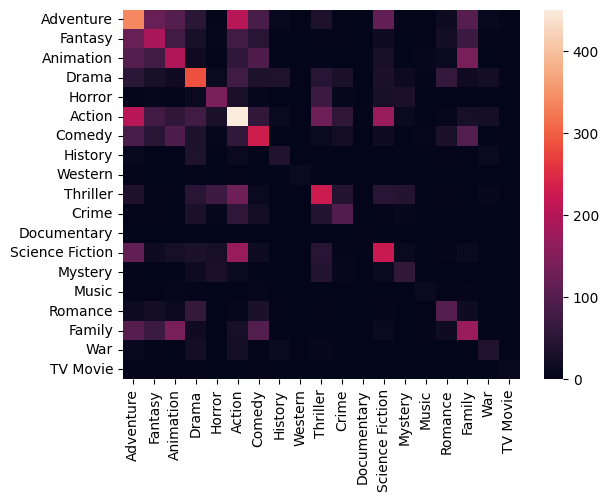

In [ ]:
annot_lookup = []
for i in range(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

In [ ]:
from sklearn.cluster import SpectralCoclustering

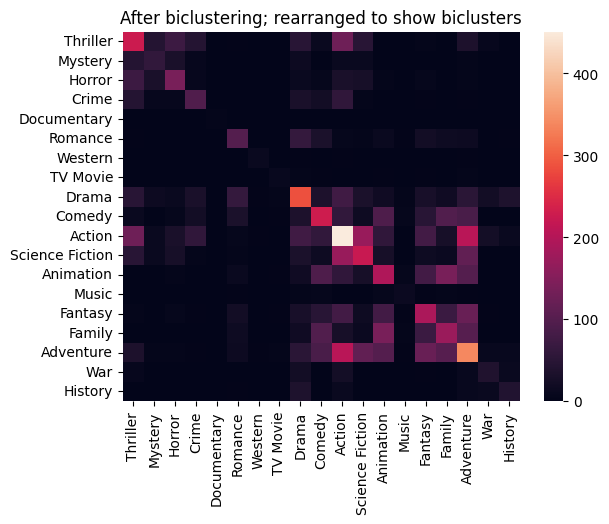

In [ ]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [ ]:
# Done before, reading from pickle file now to maintain consistency of data!
# We now sample 100 movies per genre. Problem is that the sorting is by popular movies, so they will overlap.
# Need to exclude movies that were already sampled.
# movies = []
# baseyear = 2017

# from urllib.request import urlopen

# print('Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...')
# done_ids=[]
# for g_id in nr_ids:
#     #print('Pulling movies for genre ID '+g_id)
#     baseyear -= 1
#     for page in range(1,6,1):
#         time.sleep(0.5)

#         url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + api_key
#         url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseyear)
#         url += '&with_genres=' + str(g_id) + '&page=' + str(page)

#         data = urlopen(url).read()

#         dataDict = json.loads(data)
#         movies.extend(dataDict["results"])
#     done_ids.append(str(g_id))
# print("Pulled movies for genres - "+','.join(done_ids))

In [ ]:
# f6=open("movies_for_posters",'wb')
# pickle.dump(movies,f6)
# f6.close()

In [ ]:
# f6=open("movies_for_posters",'rb')
# movies=pickle.load(f6)
# f6.close()

In [ ]:
# movie_ids = [m['id'] for m in movies]
# print("originally we had ",len(movie_ids)," movies")
# movie_ids=np.unique(movie_ids)
# print(len(movie_ids))
# seen_before=[]
# no_duplicate_movies=[]
# for i in range(len(movies)):
#     movie=movies[i]
#     id=movie['id']
#     if id in seen_before:
#         continue
# #         print "Seen before"
#     else:
#         seen_before.append(id)
#         no_duplicate_movies.append(movie)
# print("After removing duplicates we have ",len(no_duplicate_movies), " movies")

In [ ]:
# poster_movies=[]
# counter=0
# movies_no_poster=[]
# print("Total movies : ",len(movies))
# print("Started downloading posters...")
# for movie in movies:
#     id=movie['id']
#     title=movie['title']
#     if counter==1:
#         print('Downloaded first. Code is working fine. Please wait, this will take quite some time...')
#     if counter%300==0 and counter!=0:
#         print("Done with ",counter," movies!")
#         print("Trying to get poster for ", title)
#     try:
#         # below single line to be commented out if already downloaded
#         grab_poster_tmdb(title)
#         poster_movies.append(movie)
#     except:
#         try:
#             time.sleep(7)
#             grab_poster_tmdb(title)
#             poster_movies.append(movie)
#         except:
#             movies_no_poster.append(movie)
#     counter+=1
# print("Done with all the posters!")

In [ ]:
# allnames=os.listdir(poster_folder)
# imnames=[j for j in allnames if j.endswith('.jpg')]
# print("Total images = ",len(imnames))

In [ ]:
# print(len(movies_no_poster))
# print (len(poster_movies))

In [ ]:
# f=open('poster_movies.pckl','wb')
# pickle.dump(poster_movies,f)
# f.close()

In [ ]:
# f=open('poster_movies.pckl','rb')
# poster_movies=pickle.load(f)
# f.close()

In [ ]:
# f=open('no_poster_movies.pckl','wb')
# pickle.dump(movies_no_poster,f)
# f.close()

In [ ]:
# f=open('no_poster_movies.pckl','rb')
# movies_no_poster=pickle.load(f)
# f.close()

In [ ]:
# movies_with_overviews=[]
# for i in range(len(no_duplicate_movies)):
#     movie=no_duplicate_movies[i]
#     id=movie['id']
#     overview=movie['overview']

#     if len(overview)==0:
#         continue
#     else:
#         movies_with_overviews.append(movie)

# len(movies_with_overviews)

In [ ]:
# # genres=np.zeros((len(top1000_movies),3))
# genres=[]
# all_ids=[]
# for i in range(len(movies_with_overviews)):
#     movie=movies_with_overviews[i]
#     id=movie['id']
#     genre_ids=movie['genre_ids']
#     genres.append(genre_ids)
#     all_ids.extend(genre_ids)

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb=MultiLabelBinarizer()
# Y=mlb.fit_transform(genres)

In [ ]:
# genres[1]

In [ ]:
# print(Y.shape)
# print(np.sum(Y, axis=0))

In [ ]:
# len(list_of_genres)

In [ ]:
# # Create a tmdb genre object!
# genres=tmdb.Genres()
# # the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
# list_of_genres=genres.movie_list()['genres']
# Genre_ID_to_name={}
# for i in range(len(list_of_genres)):
#     genre_id=list_of_genres[i]['id']
#     genre_name=list_of_genres[i]['name']
#     Genre_ID_to_name[genre_id]=genre_name

In [ ]:
# for i in set(all_ids):
#     if i not in Genre_ID_to_name.keys():
#         print(i)

In [ ]:
# Genre_ID_to_name[10769]="Foreign" #Adding it to the dictionary

In [ ]:
# len(Genre_ID_to_name.keys())

In [ ]:
# sample_movie=movies_with_overviews[5]
# sample_overview=sample_movie['overview']
# sample_title=sample_movie['title']
# print("The overview for the movie",sample_title," is - \n\n")
# print(sample_overview)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# import re

In [ ]:
# content=[]
# for i in range(len(movies_with_overviews)):
#     movie=movies_with_overviews[i]
#     id=movie['id']
#     overview=movie['overview']
#     overview=overview.replace(',','')
#     overview=overview.replace('.','')
#     content.append(overview)

In [ ]:
# print(content[0])
# print(len(content))

In [ ]:
# get_movie_info_tmdb('The Matrix')['overview']

In [ ]:
# # The min_df paramter makes sure we exclude words that only occur very rarely
# # The default also is to exclude any words that occur in every movie description
# vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
# X=vectorize.fit_transform(content)

In [ ]:
# X.shape

In [ ]:
# import pickle
# f4=open('X.pckl','wb')
# f5=open('Y.pckl','wb')
# pickle.dump(X,f4)
# pickle.dump(Y,f5)
# f6=open('Genredict.pckl','wb')
# pickle.dump(Genre_ID_to_name,f6)
# f4.close()
# f5.close()
# f6.close()
# latest commented out, uncomment this first to troubleshoot

In [ ]:
f4=open('X.pckl','rb')
f5=open('Y.pckl','rb')
f6=open('Genredict.pckl','rb')
X=pickle.load(f4)
Y=pickle.load(f5)
Genre_ID_to_name=pickle.load(f6)
f4.close()
f5.close()
f6.close()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape

(1683, 1158)

In [ ]:
msk = np.random.rand(X_tfidf.shape[0]) < 0.8

In [ ]:
# X_train_tfidf=X_tfidf[msk]
# X_test_tfidf=X_tfidf[~msk]
# Y_train=Y[msk]
# Y_test=Y[~msk]
# positions=range(len(movies_with_overviews))
# # print positions
# test_movies=np.asarray(positions)[~msk]
# # test_movies

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

In [ ]:
# parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1.0]}
# gridCV = GridSearchCV(SVC(class_weight='balanced'), parameters, scoring=make_scorer(f1_score, average='micro'))
# classif = OneVsRestClassifier(gridCV)

# classif.fit(X_train_tfidf, Y_train)

In [ ]:
# predstfidf=classif.predict(X_test_tfidf)

# print(classification_report(Y_test, predstfidf))

In [ ]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [ ]:
# predictions=[]
# for i in range(X_test_tfidf.shape[0]):
#     pred_genres=[]
#     movie_label_scores=predstfidf[i]
# #     print movie_label_scores
#     for j in range(19):
#         #print j
#         if movie_label_scores[j]!=0:
#             genre=Genre_ID_to_name[genre_list[j]]
#             pred_genres.append(genre)
#     predictions.append(pred_genres)

In [ ]:
# import pickle
# f=open('classifer_svc','wb')
# pickle.dump(classif,f)
# f.close()

In [ ]:
# for i in range(X_test_tfidf.shape[0]):
#     if i%50==0 and i!=0:
#         print('MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictions[i]))

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# classifnb = OneVsRestClassifier(MultinomialNB())
# classifnb.fit(X[msk].toarray(), Y_train)
# predsnb=classifnb.predict(X[~msk].toarray())

In [ ]:
# import pickle
# f2=open('classifer_nb','wb')
# pickle.dump(classifnb,f2)
# f2.close()

In [ ]:
# predictionsnb=[]
# for i in range(X_test_tfidf.shape[0]):
#     pred_genres=[]
#     movie_label_scores=predsnb[i]
#     for j in range(19):
#         #print j
#         if movie_label_scores[j]!=0:
#             genre=Genre_ID_to_name[genre_list[j]]
#             pred_genres.append(genre)
#     predictionsnb.append(pred_genres)

In [ ]:
# for i in range(X_test_tfidf.shape[0]):
#     if i%50==0 and i!=0:
#         print('MOVIE: ',movies_with_overviews[i]['title'],'\tPREDICTION: ',','.join(predictionsnb[i]))

In [ ]:
# def precision_recall(gt,preds):
#     TP=0
#     FP=0
#     FN=0
#     for t in gt:
#         if t in preds:
#             TP+=1
#         else:
#             FN+=1
#     for p in preds:
#         if p not in gt:
#             FP+=1
#     if TP+FP==0:
#         precision=0
#     else:
#         precision=TP/float(TP+FP)
#     if TP+FN==0:
#         recall=0
#     else:
#         recall=TP/float(TP+FN)
#     return precision,recall

In [ ]:
# precs=[]
# recs=[]
# for i in range(len(test_movies)):
#     if i%1==0:
#         pos=test_movies[i]
#         test_movie=movies_with_overviews[pos]
#         gtids=test_movie['genre_ids']
#         gt=[]
#         for g in gtids:
#             g_name=Genre_ID_to_name[g]
#             gt.append(g_name)
# #         print predictions[i],movies_with_overviews[i]['title'],gt
#         a,b=precision_recall(gt,predictions[i])
#         precs.append(a)
#         recs.append(b)

# print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

In [ ]:
# precs=[]
# recs=[]
# for i in range(len(test_movies)):
#     if i%1==0:
#         pos=test_movies[i]
#         test_movie=movies_with_overviews[pos]
#         gtids=test_movie['genre_ids']
#         gt=[]
#         for g in gtids:
#             g_name=Genre_ID_to_name[g]
#             gt.append(g_name)
# #         print predictions[i],movies_with_overviews[i]['title'],gt
#         a,b=precision_recall(gt,predictionsnb[i])
#         precs.append(a)
#         recs.append(b)

# print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

In [ ]:
# # Loading the list of movies we had downloaded posters for eariler -
# f=open('poster_movies.pckl','rb')
# poster_movies=pickle.load(f)
# f.close()

In [ ]:
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input
# import numpy as np
# import pickle
# model = VGG16(weights='imagenet', include_top=False)

In [ ]:
# allnames=os.listdir(poster_folder)
# imnames=[j for j in allnames if j.endswith('.jpg')]
# feature_list=[]
# genre_list=[]
# file_order=[]
# print("Starting extracting VGG features for scraped images. This will take time, Please be patient...")
# print("Total images = ",len(imnames))
# failed_files=[]
# succesful_files=[]
# i=0
# for mov in poster_movies:
#     i+=1
#     mov_name=mov['original_title']
#     mov_name1=mov_name.replace(':','/')
#     poster_name=mov_name.replace(' ','_')+'.jpg'
#     if poster_name in imnames:
#         img_path=poster_folder+poster_name
#         try:
#           img = image.load_img(img_path, target_size=(224, 224))
#           succesful_files.append(poster_name)
#           x = image.img_to_array(img)
#           x = np.expand_dims(x, axis=0)
#           x = preprocess_input(x)
#           features = model.predict(x)
#           print(features.shape)
#           print(model.predict(x))
#           file_order.append(img_path)
#           feature_list.append(features)
#           genre_list.append(mov['genre_ids'])
#           if np.max(np.asarray(feature_list))==0.0:
#               print('problematic',i)
#           if i%250==0 or i==1:
#               print("Working on Image : ", i)
#         except:
#             failed_files.append(poster_name)
#         continue

#     else:
#         continue
# print("Done with all features, please pickle for future use!")

In [ ]:
# len(genre_list)

In [ ]:
# len(feature_list)

In [ ]:
# print(type(feature_list[0]))
# feature_list[0].shape

In [ ]:
# Reading from pickle below, this code is not to be run.
# list_pickled=(feature_list,file_order,failed_files,succesful_files,genre_list)
# f=open('posters_new_features.pckl','wb')
# pickle.dump(list_pickled,f)
# f.close()
# print("Features dumped to pickle file")

In [ ]:
# f7=open('posters_new_features.pckl','rb')
# list_pickled=pickle.load(f7)
# f7.close()
# # (feature_list2,file_order2)=list_pickled

In [ ]:
# (feature_list,files,failed,succesful,genre_list)=list_pickled


In [ ]:
# (a,b,c,d)=feature_list[0].shape
# feature_size=a*b*c*d
# feature_size

In [ ]:
# np_features=np.zeros((len(feature_list),feature_size))
# for i in range(len(feature_list)):
#     feat=feature_list[i]
#     reshaped_feat=feat.reshape(1,-1)
#     np_features[i]=reshaped_feat

In [ ]:
# np_features[-1]

In [ ]:
# X=np_features

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb=MultiLabelBinarizer()
# Y=mlb.fit_transform(genre_list)

In [ ]:
# Y.shape

In [ ]:
# visual_problem_data=(X,Y)
# f8=open('visual_problem_data_clean.pckl','wb')
# pickle.dump(visual_problem_data,f8)
# f8.close()

In [ ]:
f8=open('visual_problem_data_clean.pckl','rb')
visual_features=pickle.load(f8)
f8.close()

In [ ]:
(X,Y)=visual_features

In [ ]:
X.shape

(1643, 25088)

In [ ]:
mask = np.random.rand(len(X)) < 0.8

In [ ]:
X_train=X[mask]
X_test=X[~mask]
Y_train=Y[mask]
Y_test=Y[~mask]

In [ ]:
X_test.shape
Y_test.shape

(321, 19)

In [ ]:
# Y_train[115]

In [ ]:
#from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras import optimizers
# model_visual = Sequential([
#     Dense(1024, input_shape=(25088,)),
#     Activation('relu'),
#     Dense(256),
#     Activation('relu'),
#     Dense(19),
#     Activation('sigmoid'),
# ])
# # legacy below
# opt = optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-07)

# #sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
# model_visual.compile(optimizer=opt,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# model_visual.fit(X_train, Y_train, epochs=10, batch_size=64,verbose=1)

In [ ]:
# model_visual.fit(X_train, Y_train, epochs=50, batch_size=64,verbose=0)

In [ ]:
# model_visual.save('model_visual.h5')

In [ ]:
# model_visual = load_model('model_visual.h5')

In [ ]:
# Y_preds=model_visual.predict(X_test)

In [ ]:
# sum(sum(Y_preds))

In [ ]:
f6=open('Genredict.pckl','rb')
Genre_ID_to_name=pickle.load(f6)
f6.close()

In [ ]:
# sum(Y_preds[1])

In [ ]:
# sum(Y_preds[2])

In [ ]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [ ]:
# precs=[]
# recs=[]
# for i in range(len(Y_preds)):
#     row=Y_preds[i]
#     gt_genres=Y_test[i]
#     gt_genre_names=[]
#     for j in range(19):
#         if gt_genres[j]==1:
#             gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
#     top_3=np.argsort(row)[-3:]
#     predicted_genres=[]
#     for genre in top_3:
#         predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
#     (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
#     precs.append(precision)
#     recs.append(recall)
#     if i%50==0:
#         print("Predicted: ",','.join(predicted_genres)," Actual: ",','.join(gt_genre_names))

In [ ]:
# print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

In [ ]:
from gensim import models
# model2 = models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
model2 = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
# print(model2['king'].shape)
# print(model2['dog'].shape)

In [ ]:
# final_movies_set = movies_with_overviews
# len(final_movies_set)

1683

In [ ]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

In [ ]:
# movie_mean_wordvec=np.zeros((len(final_movies_set),300))
# movie_mean_wordvec.shape

In [ ]:
# genres=[]
# rows_to_delete=[]
# for i in range(len(final_movies_set)):
#     mov=final_movies_set[i]
#     movie_genres=mov['genre_ids']
#     genres.append(movie_genres)
#     overview=mov['overview']
#     tokens = tokenizer.tokenize(overview)
#     stopped_tokens = [k for k in tokens if not k in en_stop]
#     count_in_vocab=0
#     s=0
#     if len(stopped_tokens)==0:
#         rows_to_delete.append(i)
#         genres.pop(-1)
# #         print overview
# #         print "sample ",i,"had no nonstops"
#     else:
#         for tok in stopped_tokens:
#             if tok.lower() in model2.key_to_index:
#                 count_in_vocab+=1
#                 s+=model2[tok.lower()]
#         if count_in_vocab!=0:
#             movie_mean_wordvec[i]=s/float(count_in_vocab)
#         else:
#             rows_to_delete.append(i)
#             genres.pop(-1)
# #             print overview
# #             print "sample ",i,"had no word2vec"

In [ ]:
# len(genres)

In [ ]:
# mask2=[]
# for row in range(len(movie_mean_wordvec)):
#     if row in rows_to_delete:
#         mask2.append(False)
#     else:
#         mask2.append(True)

In [ ]:
# X=movie_mean_wordvec[mask2]

In [ ]:
# X.shape

In [ ]:
# Y=mlb.fit_transform(genres)

In [ ]:
# Y.shape

In [ ]:
# textual_features=(X,Y)
# f9=open('textual_features.pckl','wb')
# pickle.dump(textual_features,f9)
# f9.close()

In [ ]:
# textual_features=(X,Y)
f9=open('textual_features.pckl','rb')
textual_features=pickle.load(f9)
f9.close()

In [ ]:
(X,Y)=textual_features

In [ ]:
X.shape

(1683, 300)

In [ ]:
Y.shape

(1683, 19)

In [ ]:
mask_text=np.random.rand(len(X))<0.8

In [ ]:
X_train=X[mask_text]
Y_train=Y[mask_text]
X_test=X[~mask_text]
Y_test=Y[~mask_text]

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation

# model_textual = Sequential([
#     Dense(300, input_shape=(300,)),
#     Activation('relu'),
#     Dense(19),
#     Activation('softmax'),
# ])

# model_textual.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# model_textual.fit(X_train, Y_train, epochs=10, batch_size=500)

In [ ]:
# model_textual.fit(X_train, Y_train, epochs=10000, batch_size=500,verbose=0)

In [ ]:
# model_textual.save('model_textual.h5')

In [ ]:
model_textual = load_model('model_textual.h5')

In [ ]:
score = model_textual.evaluate(X_test, Y_test, batch_size=249)

2/2 [==============================] - 0s 8ms/step - loss: 0.1427 - accuracy: 0.4198


In [ ]:
print("%s: %.2f%%" % (model_textual.metrics_names[1], score[1]*100))

accuracy: 41.98%


In [ ]:
Y_preds=model_textual.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [ ]:
genre_list.append(10769)

In [ ]:
print("Our predictions for the movies are - \n")
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(19):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print("Predicted: ", predicted_genres, " Actual: ", gt_genre_names)

Our predictions for the movies are - 

Predicted:  ['Action', 'Comedy', 'Adventure']  Actual:  ['Adventure', 'Action', 'Comedy']
Predicted:  ['Drama', 'Thriller', 'Horror']  Actual:  ['Drama', 'Horror', 'Thriller']
Predicted:  ['Science Fiction', 'Adventure', 'Action']  Actual:  ['Adventure', 'Action', 'Science Fiction']
Predicted:  ['Horror', 'Action', 'Western']  Actual:  ['Western']
Predicted:  ['Drama', 'Music', 'Documentary']  Actual:  ['Documentary']
Predicted:  ['Drama', 'Comedy', 'Music']  Actual:  ['Music', 'Romance']
Predicted:  ['Animation', 'War', 'Science Fiction']  Actual:  ['Animation', 'Science Fiction', 'War']


In [ ]:
print(np.mean(np.asarray(precs)),np.mean(np.asarray(recs)))

0.8046647230320699 0.8485179786200193


In [ ]:
# for i in range(len(Y_preds)):
#   print(i)

In [ ]:
from keras.models import load_model
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import numpy as np
from gensim import models

# Function to preprocess the input text
def preprocess_text(input_text):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = get_stop_words('en')
    tokens = tokenizer.tokenize(input_text.lower())
    print("Tokens:", tokens)
    stopped_tokens = [token for token in tokens if token not in en_stop]
    print("Stopped Tokens:", stopped_tokens)
    return stopped_tokens

# Function to convert the preprocessed text to word vectors
def text_to_vectors(preprocessed_text):
    word_vectors = []
    for token in preprocessed_text:
       if token in model2.key_to_index:
            word_vectors.append(model2[token])
    print("Number of valid tokens:", len(word_vectors))
    return np.mean(word_vectors, axis=0)

model_textual = load_model('model_textual.h5')
input_text = "Ana, a college student, interviews an enigmatic billionaire entrepreneur, Christian, for her campus' periodical. A steamy sadomasochistic affair starts between the two, whose roots lie in his past."
preprocessed_text = preprocess_text(input_text)
input_vectors = text_to_vectors(preprocessed_text)
input_vectors = input_vectors.reshape(1, -1)
predicted_genres = model_textual.predict(input_vectors)
top_predicted_genres_indices = np.argsort(predicted_genres[0])[-3:]
predicted_genres_list = [Genre_ID_to_name[genre_list[index]] for index in top_predicted_genres_indices]
print("Predicted genres:", predicted_genres_list)

Tokens: ['ana', 'a', 'college', 'student', 'interviews', 'an', 'enigmatic', 'billionaire', 'entrepreneur', 'christian', 'for', 'her', 'campus', 'periodical', 'a', 'steamy', 'sadomasochistic', 'affair', 'starts', 'between', 'the', 'two', 'whose', 'roots', 'lie', 'in', 'his', 'past']
Stopped Tokens: ['ana', 'college', 'student', 'interviews', 'enigmatic', 'billionaire', 'entrepreneur', 'christian', 'campus', 'periodical', 'steamy', 'sadomasochistic', 'affair', 'starts', 'two', 'whose', 'roots', 'lie', 'past']
Number of valid tokens: 19
1/1 [==============================] - 0s 53ms/step
Predicted genres: ['Comedy', 'Romance', 'Drama']
